REGRESSÃO LINEAR SIMPLES

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import dos dados
dataset = pd.read_csv("/content/student_scores.csv", sep = ",")

In [3]:
#dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Shape
dataset.shape

(25, 2)

In [5]:
#Descritiva
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


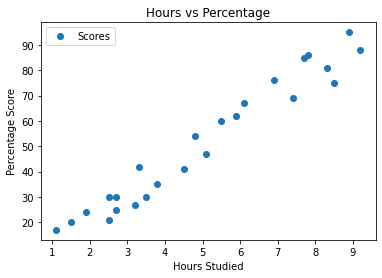

In [6]:
#Plot
dataset.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [7]:
#preparação de dados
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
#Começamos a criar nosso modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#treinando o modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Intercepto
print(regressor.intercept_)

2.018160041434662


In [11]:
#Coeficiente
print(regressor.coef_)

[9.91065648]


In [12]:
#Predição
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

O y_pred é um array numpy contendo todos os valores previstos para os valores de entrada no X_test

In [14]:
df = pd.DataFrame({'Atual': y_test, 'Predito': y_pred})
df

,Atual,Predito
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Avaliação do modelo**:

O último passo é avaliar o desempenho do algoritmo. Essa etapa é particularmente importante para comparar o desempenho de diferentes algoritmos em um determinado conjunto de dados. Para algoritmos de regressão, três métricas de avaliação são comumente usadas:

* O erro absoluto médio (MAE)
* O erro quadrático médio (MSE)
* Erro quadrático médio da raiz (RMSE)

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


REGRESSÃO LINEAR MÚLTIPLA

In [16]:
dataset = pd.read_csv("/content/petrol_consumption.csv", sep = ",")

In [17]:
#Vendo os dados
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [18]:
#Descritiva
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [19]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [20]:
# train e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#Treinamento Modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como dito anteriormente, no caso de regressão linear multivariada, o modelo de regressão deve encontrar os coeficientes mais ótimos para todos os atributos. Para ver quais coeficientes nosso modelo de regressão escolheu, podemos executar o seguinte script:

In [22]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [24]:
#Precições
y_pred = regressor.predict(X_test)

Para comparar os valores reais de saída do X_test com os valores previstos, convertemos para df:

In [25]:
df = pd.DataFrame({'Atual': y_test, 'Predicted': y_pred})
df

,Atual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [26]:
#Validação
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168
